<center><img src="media/ML_AXG-22-11_Software_Dev_Hackathon.png" style="border-radius:15px"></center>

<br>

# <b><div style="color:#211894;font-size:100%;text-align:center">Welcome to the Machine Learning Track of the Hackathon! 🚀</div></b>

## <div style="text-align:center;color:#211894;font-size:90%">Created By: Kelli Belcher</div>

## <a id="TOC">Table of Contents</a>
- [1. Introduction](#1)
    - [1.1 Learning Objectives](#1_1)
    - [1.2 Hardware](#1_2) 
    - [1.3 Import Libraries and Dataset](#1_3)  
- [2. Exploratory Data Analysis (EDA)](#2)  
    - [2.1 EDA of Numerical Variables](#2_1)
        - [2.1.1 Univariate Distributions](#2_1_1)  
        - [2.1.2 Bivariate Distributions](#2_1_2)
    - [2.2 EDA of Categorical Variables](#2_2)
    - [2.3 Correlations](#2_3)
- [3. Modeling](#3)
    - [3.1 Intel&reg; Extension for Scikit-learn](#3_1)
    - [3.2 XGBoost with Intel&reg; Daal4py](#3_2)
- [4. Summary](#4)
- [5. References](#5)

# <a class="anchor" id="1"><div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #dc98ff, #251cab)">1 | Introduction</div></a>

Welcome to the Machine Learning (ML) Track of the Hackathon! This reference notebook will demonstrate how to optimize the training cycles, prediction throughput, and accuracy of your ML workflow using several accelerated python libraries within the <b>[Intel&reg; AI Analytics Toolkit (AI Kit)](https://www.intel.com/content/www/us/en/developer/tools/oneapi/ai-analytics-toolkit.html#gs.b572eh)</b>. The main libraries we'll be working with in this notebook are the <b>[Intel&reg; Distribution of Modin*](https://www.intel.com/content/www/us/en/developer/tools/oneapi/distribution-of-modin.html#gs.9hqdj4)</b>, <b>[Intel&reg; Extension for Scikit-learn*](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.8txte9)</b>, <b>[XGBoost](https://www.intel.com/content/www/us/en/developer/articles/technical/xgboost-optimized-architecture-getting-started.html)</b>, and <b>[Intel&reg; Daal4py](https://intelpython.github.io/daal4py/)</b>, which can be downloaded as part of the AI Kit or as stand-alone libraries. We'll also demo how to log your model experiments using MLflow and stage your model for deployment into a simulated production environment, one of the final steps in the pipeline. Then, you'll be ready to apply your skills to the Machine Learning Hackathon! You may watch a video demo of this notebook below or by going to [this link](https://bcbolt446c5271-a.akamaihd.net/media/v1/pmp4/static/clear/740838651001/c8db7a6b-a6a7-4d33-8c71-aaba66de21c6/c0ee0087-f9b2-4489-95bc-80427f6155ed/main.mp4?akamai_token=exp=1663995243~acl=/media/v1/pmp4/static/clear/740838651001/c8db7a6b-a6a7-4d33-8c71-aaba66de21c6/c0ee0087-f9b2-4489-95bc-80427f6155ed/main.mp4*~hmac=75b1ed09216dd6af5da40d34632b9a6ee26573c0af3c633767a42876c56504d4).  
> Please note: you are not limited to the libraries shown in this notebook, you may use any Intel AI libraries in your solution. 

## <a class="anchor" id="1_1"><span style="padding:0px;color:#211894;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">1.1 | Data Description</span></a>

The dataset in this tutorial was generated using the open source <b>[Predictive Asset Maintenance AI Reference Kit](https://github.com/oneapi-src/predictive-health-analytics)</b> built by Intel&reg; and consists of 100,000 different utility poles with over 30 features on the overall health of the utility. Our target variable, <b>`Asset_Label`</b> is a binary indicator, representing whether or not the utility whether or not the utility pole requires maintenance. Manual problem identifications are less than 50% accurate and the costs of maintenance and replacement of utility poles are over \\$10 billion$^1$. Correctly predicting the probability of a pole replacement will help the company proactively maintain assets and avoid outages, downtime, and operational costs. You can get the code for this open-source reference kit and find out more about it by clicking on this link: https://github.com/oneapi-src/predictive-health-analytics.


## <a class="anchor" id="1_2"><span style="padding:0px;color:#211894;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">1.2 | Hardware</span></a>

In this track of the Hackathon, we will be using a 3rd Generation Intel&reg; Xeon&reg; Platinum 8375C processor, which is an Ice Lake CPU, on an AWS M6i.4xlarge instance. The details of the hardware are shown below. 3rd Generation Intel&reg; Xeon&reg; processors deliver competitive performance without the likely added cost and complexity of switching to a GPU platform and offer up to 10-100x faster Intel-optimized versions over default Scikit-Learn (SVC & kNN predict)$^2$.

In [2]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  16
  On-line CPU(s) list:   0-15
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) Platinum 8375C CPU @ 2.90GHz
    CPU family:          6
    Model:               106
    Thread(s) per core:  2
    Core(s) per socket:  8
    Socket(s):           1
    Stepping:            6
    BogoMIPS:            5799.92
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscal
                         l nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopo
                         logy nonstop_tsc cpuid aperfmperf tsc_known_freq pni pc
                         lmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe 
                         popcnt tsc_deadline_timer aes xsave 

## <a class="anchor" id="1_3"><span style="padding:0px;color:#211894;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">1.3 | Import Libraries and Dataset</span></a>

To get started, we'll be using the <b>[Intel&reg; Distribution of Modin](https://www.intel.com/content/www/us/en/developer/tools/oneapi/distribution-of-modin.html#gs.9hqdj4)</b> to process and explore the data. The Intel&reg; Distribution of Modin is a distributed DataFrame library designed to seamlessly scale your pandas workflow with the size of your dataset, supporting datasets that range from 1 MB to 1 TB+. With pandas, only one core is used at a time. However, with Modin's Dask* engine, all of the available cores are used, which allows you to work with very large datasets at much faster speeds. To utilize Modin with the Dask engine, you can use the code below:

In [4]:
import modin.pandas as pd
from modin.config import Engine
Engine.put("dask") 

In [5]:
import os
import daal4py as d4p
from xgboost import XGBClassifier
import time
import warnings
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
pio.renderers.default='notebook' 
intel_pal, color=['#0071C5','#FCBB13'], ['#7AB5E1','#FCE7B2']
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))

# Read data
data = pandas.read_pickle('media/data_100000.pkl')
print("Data shape: {}\n".format(data.shape))
display(data.head())

Data shape: (100000, 34)



Age  Elevation  Pole_Height  Measured_Length  Number_Repairs  \
0   38       2882    68.779320              694             6.0   
1   13       1215    66.048663              248             5.0   
2   73        248    57.914754             1395             3.0   
3   10        977    76.786475             1940             4.0   
4   76       4186    53.928099              785             3.0   

   Tele_Attached  Asset_Label  Manufacturer_B  Manufacturer_C  Manufacturer_D  \
0              1            0               0               0               0   
1              0            0               0               0               0   
2              1            0               1               0               0   
3              1            0               0               1               0   
4              1            1               0               0               0   

   ...  Species_C3  Species_C4  Species_C5  Species_C6  Species_C7  \
0  ...           0           0           1           0           0   
1  ...           0           0           0           0           0   
2  ...           0           0           0           0           0   
3  ...           0           0           0           0           0   
4  ...           0           0           0           0           1   

   Original_Treatment_Creosote  Original_Treatment_Oil  \
0                            1                       0   
1                            0                       1   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   Original_Treatment_Pentachlorophenol  Original_Treatment_UNK  \
0                                     0                       0   
1                                     0                       0   
2                                     1                       0   
3                                     0                       0   
4                                     0                       1   

   Original_Treatment_Untreated  
0                             0  
1                             0  
2                             0  
3                             1  
4                             0  

[5 rows x 34 columns]

# <a class="anchor" id="2"><div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #251cab, #3eb4f4, #251cab)">2 | Exploratory Data Analysis</div></a>
[Back to Table of contents](#TOC)

In the next step of the workflow, we'll explore:

- Checking for <b><span style="color:#211894;text-align:left">missing values</span></b> and <b><span style="color:#211894;text-align:left">duplicates</span></b> in the dataset.
- Descriptive statistics of the dataset, including the <b><span style="color:#211894;text-align:left">mean</span></b>, <b><span style="color:#211894;text-align:left">min</span></b>, <b><span style="color:#211894;text-align:left">max</span></b>, <b><span style="color:#211894;text-align:left">standard deviation</span></b>, <b><span style="color:#211894;text-align:left">skewness</span></b>, and <b><span style="color:#211894;text-align:left">kurtosis</span></b>.
- The distribution of the target variable, <b>`Asset_Label`</b>.
- <b><span style="color:#211894;text-align:left">Univariate</span></b> and <b><span style="color:#211894;text-align:left">bivariate</span></b> distributions of the numerical and categorical features.
- <b><span style="color:#211894;text-align:left">Correlations</span></b> between the variables in the dataset.

In [6]:
display(data.isna().sum())
missing=data.isna().sum().sum()
duplicates=data.duplicated().sum()
print("\nThere are {:,.0f} missing values in the data.".format(missing))
print("There are {:,.0f} duplicate records in the data.".format(duplicates))

Age                                     0
Elevation                               0
Pole_Height                             0
Measured_Length                         0
Number_Repairs                          0
Tele_Attached                           0
Asset_Label                             0
Manufacturer_B                          0
Manufacturer_C                          0
Manufacturer_D                          0
Manufacturer_E                          0
Manufacturer_F                          0
Manufacturer_G                          0
Manufacturer_H                          0
Manufacturer_I                          0
Manufacturer_J                          0
District_N                              0
District_NE                             0
District_NW                             0
District_S                              0
District_SE                             0
District_SW                             0
District_W                              0
Species_C2                        


There are 0 missing values in the data.
There are 0 duplicate records in the data.


At first glance, the dataset appears to be fairly clean with no missing or duplicate records. Let's now look at the descriptive statistics of the dataset. Descriptive statistics provide a numerical summary of the central tendency, dispersion, and shape of the data's distribution, excluding `NaN` values.

In [7]:
def display_stats(df):
    
    """
    Function to display descriptive statistics of numerical variables,
    includes skewness & kurtosis.   
    """
    
    df=data.describe()
    skewness=data.skew()
    kurtosis=data.kurtosis()
    df=df.append([skewness, kurtosis],ignore_index=True)
    idx=pd.Series(['count','mean','std','min','25%','50%','75%','max','skewness','kurtosis'],name='Summary Statistic')
    df=pd.concat([df,idx],1).set_index('Summary Statistic')
    display(df.style.format('{:,.3f}').
        background_gradient(subset=(df.index[1:],df.columns[:]),
                            cmap='GnBu'))

display_stats(data)

In [8]:
def plot_target_dist(target_col):
    
    """Function to display distribution of the target variable"""
    
    target=data[target_col].value_counts(normalize=True)
    target.rename(index={1:'State 1',0:'State 0'},inplace=True)
    fig=go.Figure()
    fig.add_trace(go.Pie(labels=target.index, values=target*100, hole=.45, 
                         text=target.index, sort=False, showlegend=False,
                         marker=dict(colors=color,line=dict(color=intel_pal,width=2.5)),
                         hovertemplate = "%{label}: <b>%{value:.2f}%</b><extra></extra>"))
    fig.update_layout(template=temp, title='Target Distribution',width=700,height=450,
                      uniformtext_minsize=15, uniformtext_mode='hide')
    fig.show() 
    
plot_target_dist(target_col='Asset_Label')

![fig1](media/fig1.png)

About 40% of poles in our data have been identified as requiring maintenance, shown in the yellow portion of the chart. Given the imbalance in the distribution of our target variable, we will use <b><span style="color:#211894;text-align:left">stratified sampling</span></b> during cross-validation.

## <a class="anchor" id="2_1"><div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #009ff2, #251cab)">2.1 | EDA of Numerical Variables</div></a>

[Back to Table of Contents](#TOC)

<br>

<b><a class="anchor" id="2_1_1"><span style="padding:0px;color:#211894;margin:0;font-size:120%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">2.1.1 | Univariate Distributions</span></a></b>

Now that we have a better understanding of the target distribution, let's take a closer look at the features in the dataset to identify any patterns. The graphs below show the Kernel Density Estimation (KDE) plots of the numerical variables, which visually display the shape of the data using its probability density function.

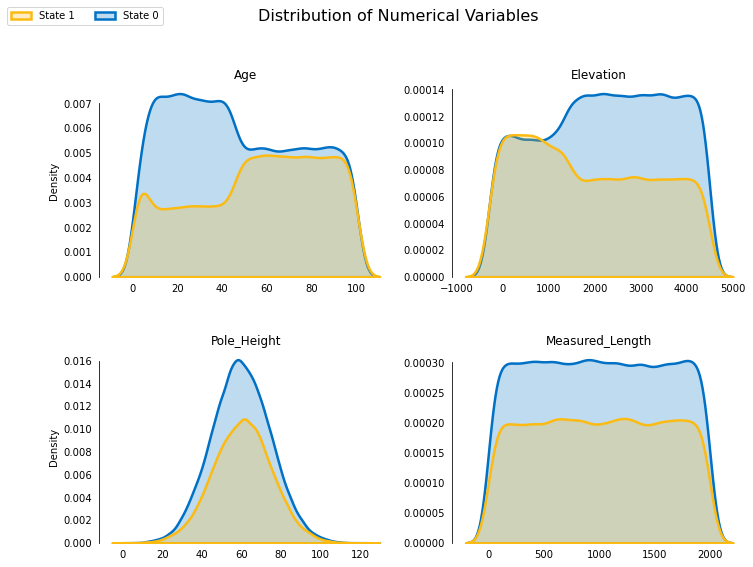

In [9]:
cat_cols,float_cols=[],['Asset_Label']
for col in data.columns:
    if data[col].value_counts().count()<10:
        cat_cols.append(col)
    else:
        float_cols.append(col)
        
plot_df=data[float_cols]
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Distribution of Numerical Variables',fontsize=16)
row=0
col=[0,1]*2
for i, column in enumerate(plot_df.columns[1:]):
    if (i!=0)&(i%2==0):
        row+=1
    sns.kdeplot(x=column, hue='Asset_Label', palette=intel_pal[::-1], hue_order=[1,0], 
                label=['State 1','State 0'], data=plot_df, 
                fill=True, linewidth=2.5, legend=False, ax=ax[row,col[i]])
    ax[row,col[i]].tick_params(left=False, bottom=False)
    ax[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=('Density' if i%2==0 else ''))

handles, _ = ax[0,0].get_legend_handles_labels() 
fig.legend(labels=['State 1','State 0'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 0.99))
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

In the graphs above, we see the variable `Pole_Height` has a bell-shaped curve following a normal distribution, while the remaining variables more closely resemble uniform, non-normal distributions.

<b><a class="anchor" id="2_1_2"><span style="padding:0px;color:#211894;margin:0;font-size:120%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">2.1.2 | Bivariate Distributions</span></a></b>

In [10]:
fig=make_subplots(rows=2,cols=2, subplot_titles=float_cols[1:])
col=[1,2]*2
row=0
pal=sns.color_palette("GnBu",20).as_hex()[9:][::3]
for i, column in enumerate(data[float_cols].columns[1:]):
    if i%2==0:
        row+=1
    df = pd.concat([data[column],data['Asset_Label']],axis=1)
    df['bins'] = pd.cut(df[column],300)
    df['mean'] = df.bins.apply(lambda x: x.mid)
    df = df.groupby('mean')[column,'Asset_Label'].transform('mean')
    df = df.drop_duplicates(subset=[column]).sort_values(by=column)
    fig.add_trace(go.Scatter(x=df[column], y=df.Asset_Label, name=column,
                             marker_color=pal[i],showlegend=False),
                  row=row, col=col[i])
    fig.update_xaxes(zeroline=False, row=row, col=col[i])
    if i%2==0:
        fig.update_yaxes(title='Target Probabilitiy',row=row,col=col[i])
fig.update_layout(template=temp, title='Feature Relationships with Target', 
                  hovermode="x unified",height=700,width=900)
fig.show()

![fig2](media/fig2.png)

To identify the relationships between the target variable and the continuous features, the graphs above depict the target probability across the values in each feature. In `Age`, we see the probability tends to be higher in poles that are above about 45 years and less than 5 years, while in `Elevation` this is true for poles that are below about 1,000 feet. In addition, we see there are non-linear relationships between the target and the features, which suggests we may want to try a nonparametric model. This is further demonstrated in the scatterplot matrix below, where we see very weak linearity and low correlations between the numerical features in the data.

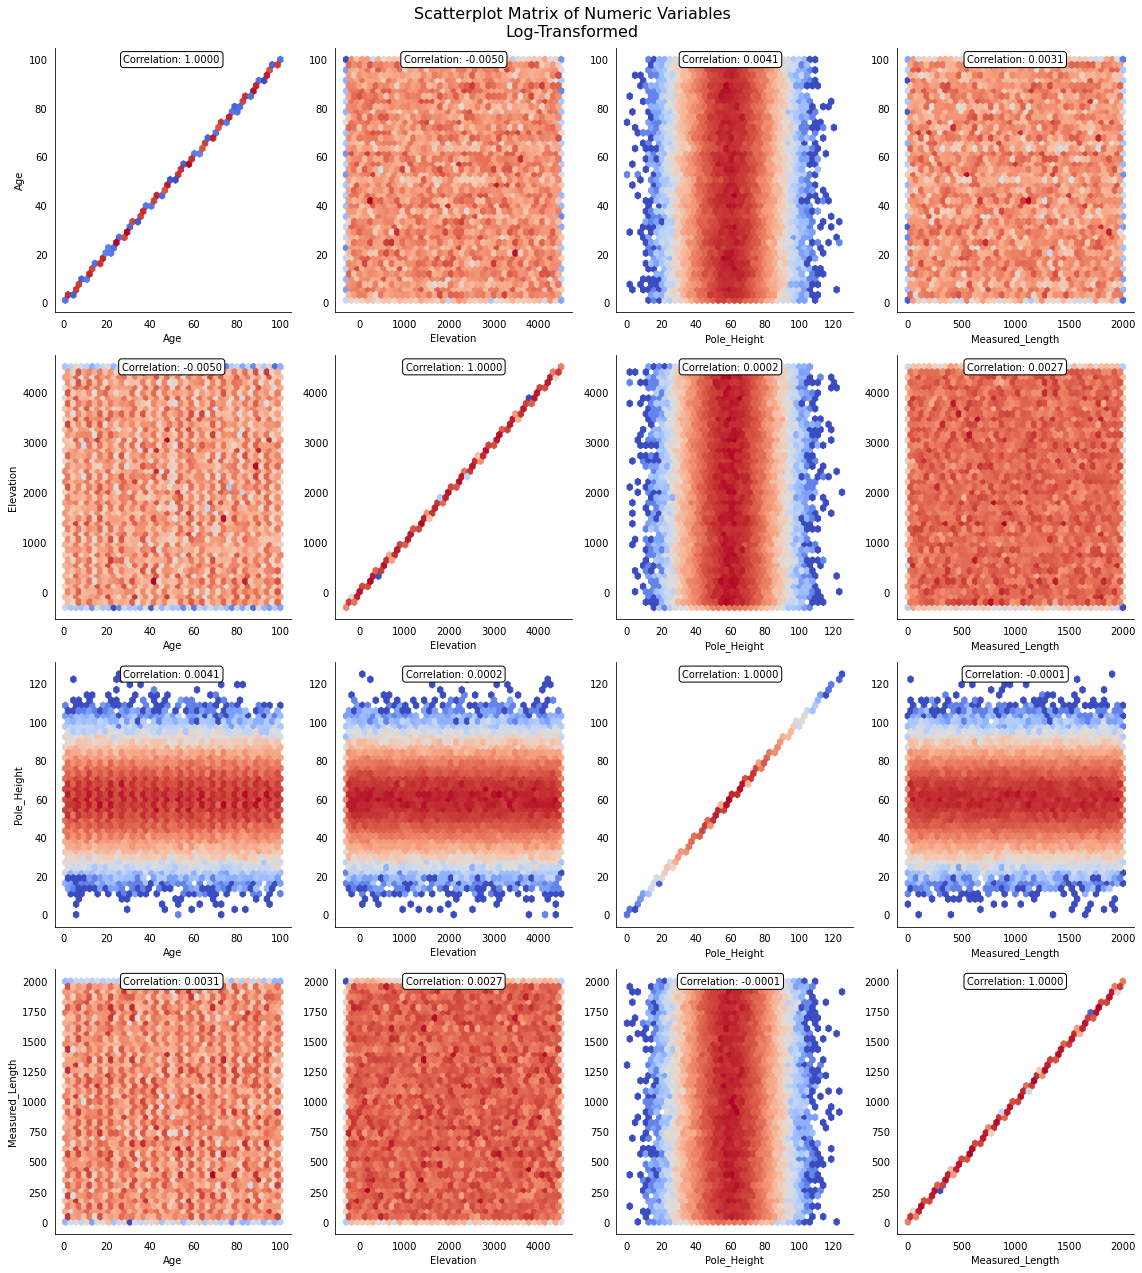

In [11]:
plot_df=data[float_cols]
fig, ax = plt.subplots(4,4, figsize=(16,18))
fig.suptitle('Scatterplot Matrix of Numeric Variables\nLog-Transformed',fontsize=16)
for i, col in enumerate(float_cols[1:]):
    for j, iter_col in enumerate(float_cols[1:]):
        ax[i,j].hexbin(x=iter_col, y=col, data=plot_df, bins='log', gridsize=40, cmap='coolwarm')
        ax[i,j].set(xlabel=iter_col, ylabel=(col if j%4==0 else ''))
        ax[i,j].text(plot_df[iter_col].median(), plot_df[col].max(), 
                     'Correlation: {:.4f}'.format(plot_df[[col,iter_col]].corr().iloc[1,0]), 
                   ha="center", va="center",bbox=dict(boxstyle="round,pad=0.3",fc="white"))
        ax[i,j].tick_params(left=False,bottom=False)    

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

## <a class="anchor" id="2_2"><div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #009ff2, #251cab)">2.2 | EDA of Categorical Variables</div></a>

[Back to Table of Contents](#TOC)

Now that we have explored our numerical variables, let's take a look at the distributions in the categorical features. The categorical features in the dataset have already been preprocessed using  one-hot encoding, which qualitatively represents the presence or absence of the variable with a corresponding 1 or 0, respectively. The graphs below show the frequency of the occurrence of each feature, colored by the target label. 

In [12]:
fig = make_subplots(rows=10, cols=3, subplot_titles=[c for c in cat_cols if c!='Asset_Label'])
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.6)) for i in intel_pal]
row=0
c=[1,2,3]*10
for i, col in enumerate(c for c in cat_cols if c!='Asset_Label'):
    if i%3==0:
        row+=1
    df=data.groupby(col)['Asset_Label'].value_counts().rename('count').reset_index()
    fig.add_trace(go.Bar(x=df[df.Asset_Label==1][col], y=df[df.Asset_Label==1]['count'],width=.35,
                         marker_color=rgb[1], marker_line=dict(color=intel_pal[1],width=2.5), 
                         hovertemplate='Value: %{x}<br>Count: %{y}',
                         name='State 1', showlegend=(True if i==0 else False)),
                  row=row, col=c[i])
    fig.add_trace(go.Bar(x=df[df.Asset_Label==0][col], y=df[df.Asset_Label==0]['count'],width=.35,
                         marker_color=rgb[0], marker_line=dict(color=intel_pal[0],width=2.5),
                         hovertemplate='Value: %{x}<br>Count: %{y}',
                         name='State 0', showlegend=(True if i==0 else False)),
                  row=row, col=c[i])
    if i%3==0:
        fig.update_yaxes(title='Frequency',row=row,col=c[i])
fig.update_layout(template=temp,title="Distributions of Categorical Variables",
                  legend=dict(orientation="h",yanchor="bottom",y=1.025,xanchor="right",x=.2),
                  barmode='group',height=2000,width=900)
fig.show()

![fig3](media/fig3.png)

## <a class="anchor" id="2_3"><div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #009ff2, #251cab)">2.3 | Correlations</div></a>

[Back to Table of Contents](#TOC)

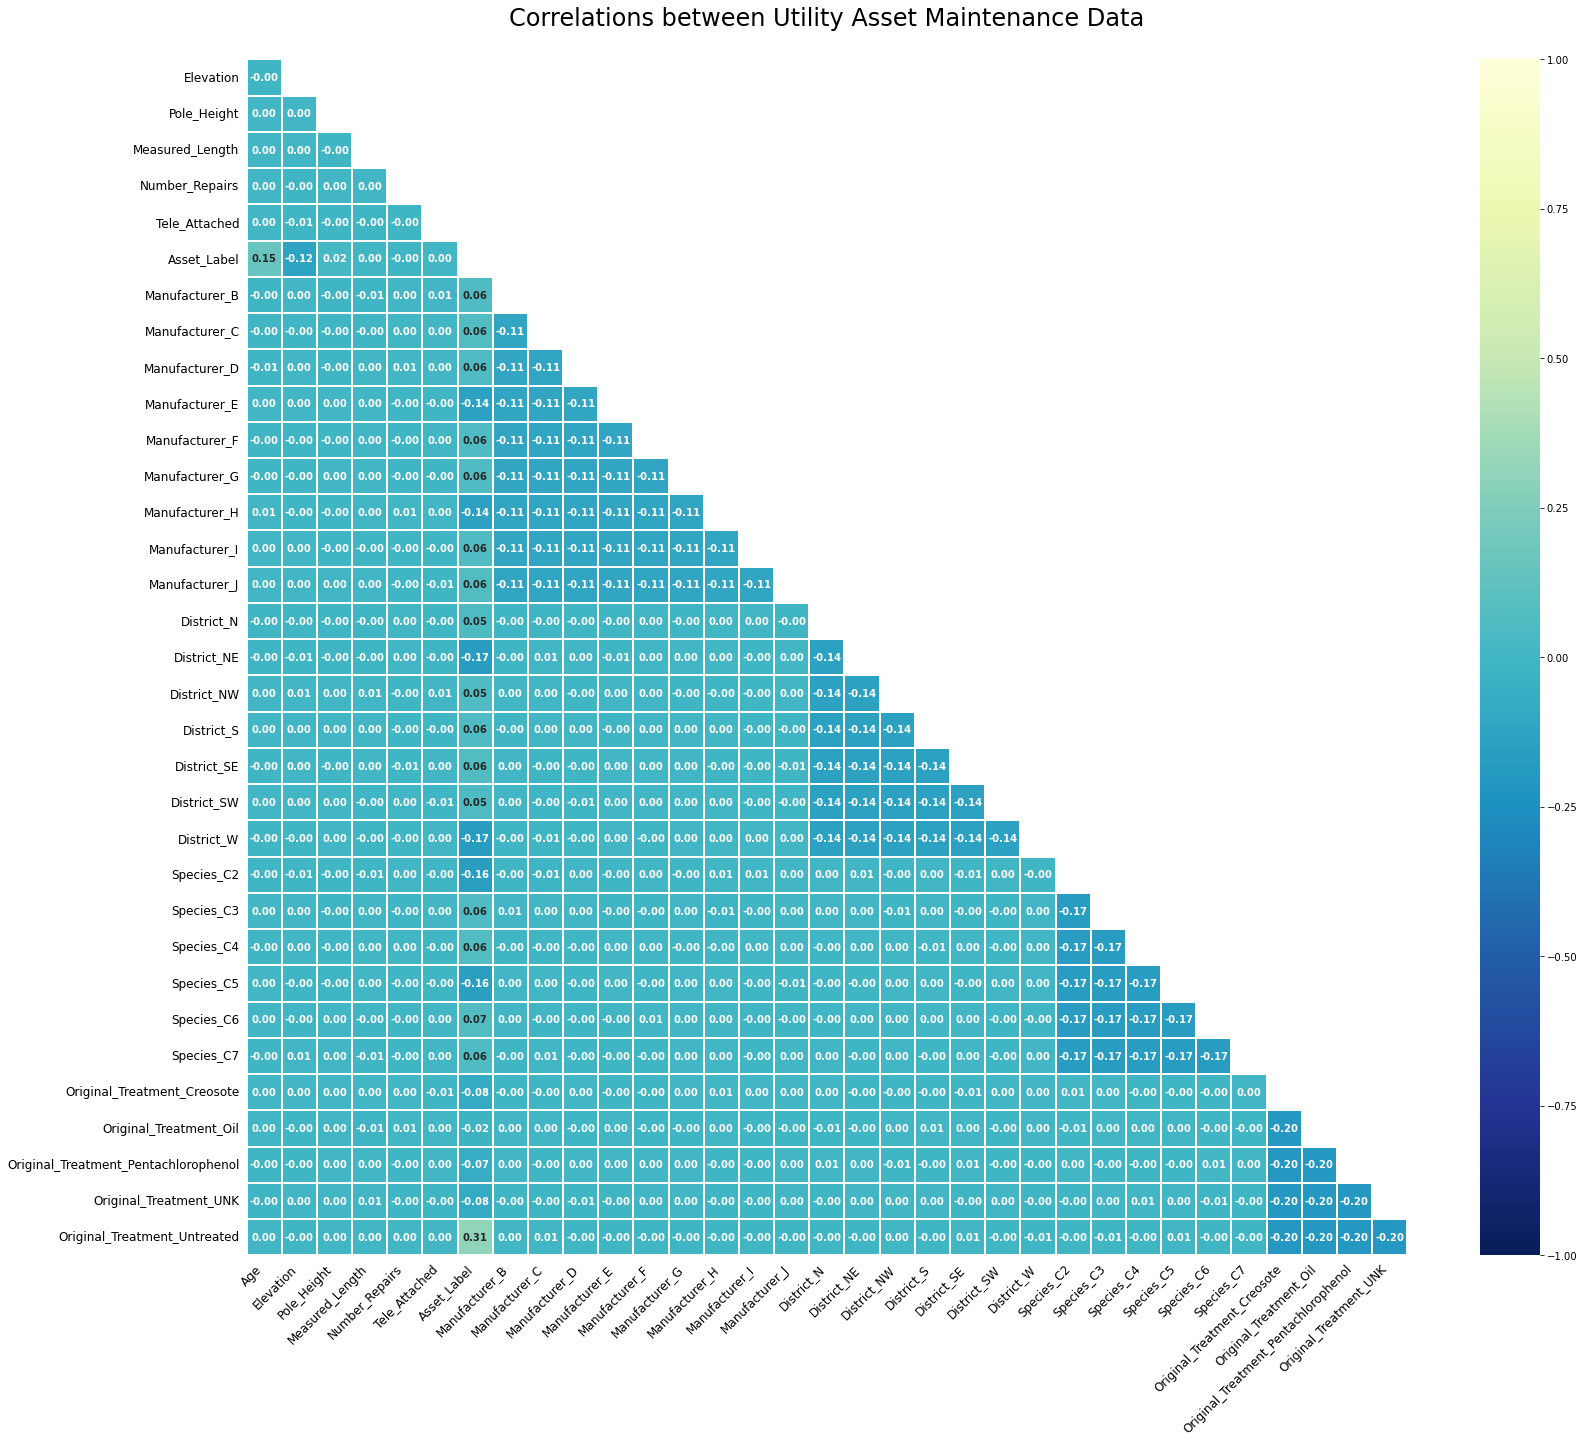

In [13]:
def plot_corr(corr):
    """
    Function to plot bottom left triangle of correlation matrix
    """
    mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
    corr=corr.iloc[1:,:-1].copy()
    fig, ax = plt.subplots(figsize=(26,22))   
    sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
                cmap='YlGnBu_r',lw=2, annot_kws={'fontsize':10,'fontweight':'bold'}, cbar=True)
    ax.tick_params(left=False,bottom=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
    plt.title('Correlations between Utility Asset Maintenance Data\n', fontsize=24)
    plt.show()
    
def plot_target_corr(corr, target_col): 
    """
    Function to plot a bar chart of correlations between target and features, sorted in descending order
    """
    corr=corr[target_col].sort_values(ascending=False)[1:]
    pal=sns.color_palette("RdYlBu",37).as_hex()
    pal=[j for i,j in enumerate(pal) if i not in (17,18)]
    rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.8)) for i in pal] 
    
    fig=go.Figure()
    fig.add_trace(go.Bar(x=corr.index, y=corr, marker_color=rgb,
                         marker_line=dict(color=pal,width=2),
                         hovertemplate='%{x} correlation with Target = %{y}',
                         showlegend=False, name=''))
    fig.update_layout(template=temp, title='Feature Correlations with Target (Asset Label)', 
                      yaxis_title='Correlation', margin=dict(b=160), xaxis_tickangle=45)
    fig.show()
    
corr=data.corr()
plot_corr(corr=corr)
plot_target_corr(corr=corr, target_col='Asset_Label')

![fig4](media/fig4.png)

As we saw in the scatterplot matrix above, there were very low correlations among the numerical features, which also remains true between the rest of the features in the dataset. Among our target variable, `Asset_Label`, the highest positive association exists with `Original_Treatment_Untreated` at 0.311 and the strongest negative relationship between `District_W` at -0.172

# <a class="anchor" id="3"><div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #3eb4f4, #251cab)">3 | Modeling</div></a>

[Back to Table of Contents](#TOC)

In this section, we will explore different Machine Learning models to predict whether or not a pole will need maintenance. With binary classification tasks, there are many different models to choose from. Some of the most common models include Logistic Regression, Naive Bayes, K-Nearest Neighbors, Support Vector Machines, and ensemble methods, like Random Forests and XGBoost. Since we saw there were nonlinear relationships between the features and the target variable in the graphs above, we will compare two nonparametric models: Support Vector Machines and XGBoost.

In [14]:
def prepare_train_test_data(data, target_col, test_size):
    
    """
    Function to scale and split the data into training and test sets
    """
    
    scaler = RobustScaler()   
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=21)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Train Shape: {}".format(X_train_scaled.shape))
    print("Test Shape: {}".format(X_test_scaled.shape))
    
    return X_train_scaled, X_test_scaled, y_train, y_test

def plot_model_res(model_name, y_test, y_prob):
    
    """
    Function to plot ROC/PR Curves and predicted target distribution
    """
    
    intel_pal=['#0071C5','#FCBB13']
    color=['#7AB5E1','#FCE7B2']
    
    ## ROC & PR Curve ##
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr,tpr)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auprc = average_precision_score(y_test, y_prob)
    
    fig = make_subplots(rows=1, cols=2, 
                        shared_yaxes=True, 
                        subplot_titles=['Receiver Operating Characteristic<br>(ROC) Curve',
                                        'Precision-Recall Curve<br>AUPRC = {:.3f}'.format(auprc)])
    
    fig.add_trace(go.Scatter(x=np.linspace(0,1,11), y=np.linspace(0,1,11), 
                             name='Baseline',mode='lines',legendgroup=1,
                             line=dict(color="Black", width=1, dash="dot")), row=1,col=1)    
    fig.add_trace(go.Scatter(x=fpr, y=tpr, line=dict(color=intel_pal[0], width=3), 
                             hovertemplate = 'True positive rate = %{y:.3f}, False positive rate = %{x:.3f}',
                             name='AUC = {:.4f}'.format(roc_auc),legendgroup=1), row=1,col=1)
    fig.add_trace(go.Scatter(x=recall, y=precision, line=dict(color=intel_pal[0], width=3), 
                             hovertemplate = 'Precision = %{y:.3f}, Recall = %{x:.3f}',
                             name='AUPRC = {:.4f}'.format(auprc),showlegend=False), row=1,col=2)
    fig.update_layout(template=temp, title="{} ROC and Precision-Recall Curves".format(model_name), 
                      hovermode="x unified", width=900,height=500,
                      xaxis1_title='False Positive Rate (1 - Specificity)',
                      yaxis1_title='True Positive Rate (Sensitivity)',
                      xaxis2_title='Recall (Sensitivity)',yaxis2_title='Precision (PPV)',
                      legend=dict(orientation='v', y=.07, x=.45, xanchor="right",
                                  bordercolor="black", borderwidth=.5))
    fig.show()
    
    ## Target Distribution ##     
    plot_df=pd.DataFrame.from_dict({'State 0':(len(y_prob[y_prob<=0.5])/len(y_prob))*100, 
                                    'State 1':(len(y_prob[y_prob>0.5])/len(y_prob))*100}, 
                                   orient='index', columns=['pct'])
    fig=go.Figure()
    fig.add_trace(go.Pie(labels=plot_df.index, values=plot_df.pct, hole=.45, 
                         text=plot_df.index, sort=False, showlegend=False,
                         marker=dict(colors=color,line=dict(color=intel_pal,width=2.5)),
                         hovertemplate = "%{label}: <b>%{value:.2f}%</b><extra></extra>"))
    fig.update_layout(template=temp, title='Predicted Target Distribution',width=700,height=450,
                      uniformtext_minsize=15, uniformtext_mode='hide')
    fig.show()

## <a class="anchor" id="3_1"><span style="padding:0px;color:#211894;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">3.1 | Support Vector Classifier with Intel&reg; Extension for Scikit-learn</span></a>

[Back to Table of Contents](#TOC)

The first model we will demonstrate is a Support Vector Classifier (SVC). Support Vector Classifiers were introduced in 1992 by Vapnik and colleagues as an algorithm that maximizes the margin between the training patterns and the decision boundary [[1](https://dl.acm.org/doi/10.1145/130385.130401)]. We will be importing the SVC library from the Scikit-learn package in Python and utilizing the accelerations provided with the [Intel&reg; Extension for Scikit-learn](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.begztq). 

The Intel&reg; Extension for Scikit-learn offers a seamless integration with scikit-learn applications for Intel&reg; CPUs and GPUs across single- and multi-node configurations while reducing algorithm run time. To take advantage of the accelerations, all you need to do is call the `patch_sklearn()` function as shown in the code cell below and continue using the same AI packages and scikit-learn libraries without any other changes to your code. The patch will replace supported stock scikit-learn algorithms with their optimized versions. To learn more about which algorithms are supported, please visit our [Developer Guide](https://intel.github.io/scikit-learn-intelex/index.html).

In [15]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Now that we've enabled the Intel&reg; Extension for Scikit-learn, we will split our data into training and test sets and tune the hyperparameters of the Support Vector Machine using stratified 3-fold cross-validation. The results of the hyperparameter tuning and model performance on the test set are shown in the graphs below. As this is a binary classification task, the main evaluation metrics we will be focusing on are the $F_{1}$ score and the Area Under the ROC Curve (AUC). 

The <b>[$F_{1}$ score](https://en.wikipedia.org/wiki/F-score)</b> represents the harmonic mean between the Precision and Recall of the positive class, indicated by a 1. It can be derived using the following calculation: 

<br>

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall} = \frac{2 * TP}{2 * TP + FP + FN}$$

<br>

While most metrics are calculated using a classification threshold of 0.5, the <b>[Area Under the ROC Curve (AUC)](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)</b> is an aggregate representation of the model's performance across all possible thresholds. It can be interpreted as the probability that a randomly-selected observation from the positive class will be ranked more highly than a randomly-selected observation from the negative class.

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.svm import SVC

In [17]:
## Prepare Train and Test datasets ##
print("Preparing Train and Test datasets")
X_train, X_test, y_train, y_test = prepare_train_test_data(data=data, 
                                                            target_col='Asset_Label', 
                                                            test_size=.25)
## Initialize SVC model ##
parameters = {
    'class_weight': 'balanced',
    'probability': True,
    'random_state': 21}
svc = SVC(**parameters)

## Tune Hyperparameters ##
strat_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=21)
print("\nTuning hyperparameters..")
grid = {
    'C': np.logspace(-1, 1, 5),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
grid_search = RandomizedSearchCV(svc, param_distributions=grid, 
                                    cv=strat_kfold, n_iter=5, scoring='roc_auc', 
                                    verbose=1, n_jobs=-1, random_state=21)
grid_search.fit(X_train, y_train)
    
print("Done!\nBest hyperparameters:", grid_search.best_params_)
print("Best cross-validation AUC: {:.4f}".format(grid_search.best_score_))

svc = grid_search.best_estimator_
svc_prob = svc.predict_proba(X_test)[:,1]
svc_pred = pd.Series(svc.predict(X_test), name='Target')
svc_auc = roc_auc_score(y_test, svc_prob)
svc_f1 = f1_score(y_test, svc_pred)  
   
## Print model results ##
print("\nTest F1 accuracy: {:.2f}%, AUC: {:.5f}".format(svc_f1*100,svc_auc))
plot_model_res(model_name='SVC', y_test=y_test, y_prob=svc_prob)

Preparing Train and Test datasets
Train Shape: (75000, 33)
Test Shape: (25000, 33)

Tuning hyperparameters..
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done!
Best hyperparameters: {'kernel': 'poly', 'C': 3.1622776601683795}
Best cross-validation AUC: 0.9069

Test F1 accuracy: 86.12%, AUC: 0.91112


![fig5](media/fig5.png)
![fig6](media/fig6.png)

Using a polynomial kernel with a regularization parameter of about 3.16, the Support Vector Classifier achieved an [$F_{1}$ score](https://en.wikipedia.org/wiki/F-score) of 86.12% and an [Area Under the ROC Curve (AUC)](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) of 0.91 on the test set.
Next, we'll see if we we can improve on the performance of the SVC using a different type of machine learning algorithm, an XGBoost model.

## <a class="anchor" id="3_2"><span style="padding:0px;color:#211894;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">3.2 | XGBoost Optimized for Intel&reg; Architectures</span></a>
[Back to Table of Contents](#TOC)

In this section, we will explore the eXtreme Gradient Boosting algorithm, also known as XGBoost. XGBoost was introduced in 2016 by Chen and Guestrin as a scalable end-to-end decision tree boosting system. While it is still relatively new, it has become a widely used model by data scientists to achieve state-of-the-art results on many machine learning challenges [[2](https://arxiv.org/abs/1603.02754)]. Since XGBoost version 0.81, Intel&reg; has introduced many optimizations to maximize training performance that have been upstreamed into the package. 

We will follow the same steps as above, beginning with splitting our data into training and test sets and tuning the hyperparameters of the XGBoost model using stratified 3-fold cross-validation. Once we have found the best hyperparameters for the XGBoost model, we will convert it to a daal4py model for further improved performance on prediction time. [Daal4py](https://intelpython.github.io/daal4py/) can be downloaded from the [Intel&reg; oneAPI Data Analytics Library (oneDAL)](https://oneapi-src.github.io/oneDAL/) and utilizes the underlying Intel&reg; Advanced Vector Extensions (Intel&reg; AVX-512) hardware to maximize gradient boosting performance on Intel&reg; Xeon&reg; processors.

To convert a tuned XGBoost model to Daal4py is very easy to do in one line of code with the `get_gbt_model_from_xgboost()` function. Then, you can send the trained model along with the input data using Daal4py's prediction function to calculate the probabilities on the test set. 

In [18]:
## Prepare Train and Test datasets ##
print("Preparing Train and Test datasets")
X_train, X_test, y_train, y_test = prepare_train_test_data(data=data,
                                                            target_col='Asset_Label', 
                                                            test_size=.25)
    
## Initialize XGBoost model ##
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
parameters = {'scale_pos_weight': ratio.round(2), 
                'tree_method': 'hist',
                'random_state': 21}
xgb_model = XGBClassifier(**parameters)

## Tune hyperparameters ##
strat_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=21)
print("\nTuning hyperparameters..")
grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5],
        }

grid_search = GridSearchCV(xgb_model, param_grid=grid, 
                            cv=strat_kfold, scoring='roc_auc', 
                            verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Done!\nBest hyperparameters:", grid_search.best_params_)
print("Best cross-validation AUC: {:.4f}".format(grid_search.best_score_))
    
## Convert XGB model to daal4py ##
xgb = grid_search.best_estimator_
daal_model = d4p.get_gbt_model_from_xgboost(xgb.get_booster())

## Calculate predictions ##
daal_prob = d4p.gbt_classification_prediction(nClasses=2,
    resultsToEvaluate="computeClassLabels|computeClassProbabilities",
    fptype='float').compute(X_test, daal_model).probabilities # or .predictions
xgb_pred = pd.Series(np.where(daal_prob[:,1]>.5, 1, 0), name='Target')
xgb_auc = roc_auc_score(y_test, daal_prob[:,1])
xgb_f1 = f1_score(y_test, xgb_pred)  
    
## Plot model results ##
print("\nTest F1 Accuracy: {:.2f}%, AUC: {:.5f}".format(xgb_f1*100, xgb_auc)) 
plot_model_res(model_name='XGBoost', y_test=y_test, y_prob=daal_prob[:,1])

Preparing Train and Test datasets
Train Shape: (75000, 33)
Test Shape: (25000, 33)

Tuning hyperparameters..
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Done!
Best hyperparameters: {'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5}
Best cross-validation AUC: 0.9380

Test F1 Accuracy: 90.15%, AUC: 0.94006


![fig7](media/fig7.png)
![fig8](media/fig8.png)

The XGBoost model improved both the F1 accuracy and the AUC to over 90% and 0.94, respectively.

# <a class="anchor" id="4"><div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #3eb4f4, #251cab)">4 | Conclusion</div></a>
[Back to Table of Contents](#TOC)

Thank you for reading! This reference kit implementation provides a performance-optimized guide around the prediction of Asset Maintenance for Utility customers that can easily be scaled across similar industries and use cases. If you would like to learn more and download the Intel&reg; Predictive Asset Maintenance AI Reference Kit, please visit this link: https://github.com/oneapi-src/predictive-health-analytics

## <a class="anchor" id="5"><span style="padding:0px;color:#251cab;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">References</span></a>

1. Boser, B., Guyon, I., Vapnik, V. (1992, July). A training algorithm for optimal margin classifiers. In: <i>Proceedings of the Fifth Annual Workshop on Computational Learning Theory</i>.
2. Chen, T., & Guestrin, C. (2016, August). Xgboost: A scalable tree boosting system. In: <i>Proceedings of the 22nd acm sigkdd international conference on knowledge discovery and data mining </i>(pp. 785-794).

## <span style="padding:0px;color:#251cab;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">Footnotes</span>
$^1$ Utility Poles: Maintenance or Replacement. Utility Partners of America. August 3, 2020.  
$^2$ See [117] at [www.intel.com/3gen-xeon-config](www.intel.com/3gen-xeon-config). Results may vary.


## <span style="padding:0px;color:#251cab;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">Notices & Disclaimers</span>
Intel optimizations, for Intel compilers or other products, may not optimize to the same degree for non-Intel products.  
Performance varies by use, configuration and other factors. Learn more on the Performance Index site.   
Performance results are based on testing as of dates shown in configurations and may not reflect all publicly available updates.  See backup for configuration details.  No product or component can be absolutely secure.   
Your costs and results may vary.   
Intel technologies may require enabled hardware, software or service activation.  
&copy; Intel Corporation.  Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries.  Other names and brands may be claimed as the property of others.  